# Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from czifile import * # for loading lsm-files
import numpy as np
import os
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import seaborn as sns

import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import math
import anndata as ad
from scipy.sparse import csr_matrix

import scipy.optimize as opt
import ast

import sys,os
from matplotlib import colors
from matplotlib import cm as cmx
from tqdm import tqdm

from Code import Main_v2
from Code import Plate_Plotter
from Code.Plate_Viz import *
from Code.Quality_Control import *
from Code.Image_To_MFI import*
from Code import MetaSAR_Visualization

# Data Import

In [2]:
Fib_long  = pd.read_csv(f"Results/JJ/updated/Fib_long.csv")
Fib_short = pd.read_csv(f"Results/JJ/updated/Fib_short.csv")
Fib_result_list = pd.read_csv(f'Results/JJ/updated/Fib_result_list.csv')
Fib_metasar = pd.read_csv(f"Results/JJ/updated/Fib_metasar.csv")
QIC_Fib_post4 = pd.read_csv(f"Results/JJ/postqc/Fib_postQC_List.csv")

Col_long  = pd.read_csv(f"Results/JJ/updated/Col_long.csv")
Col_short = pd.read_csv(f"Results/JJ/updated/Col_short.csv")
Col_result_list = pd.read_csv(f'Results/JJ/updated/Col_result_list.csv')
Col_metasar = pd.read_csv(f"Results/JJ/updated/Col_metasar.csv")
QIC_Col_post4 = pd.read_csv(f"Results/JJ/postqc/Col_postQC_List.csv")


# Scatter Plot

### Fibulin ranking plot

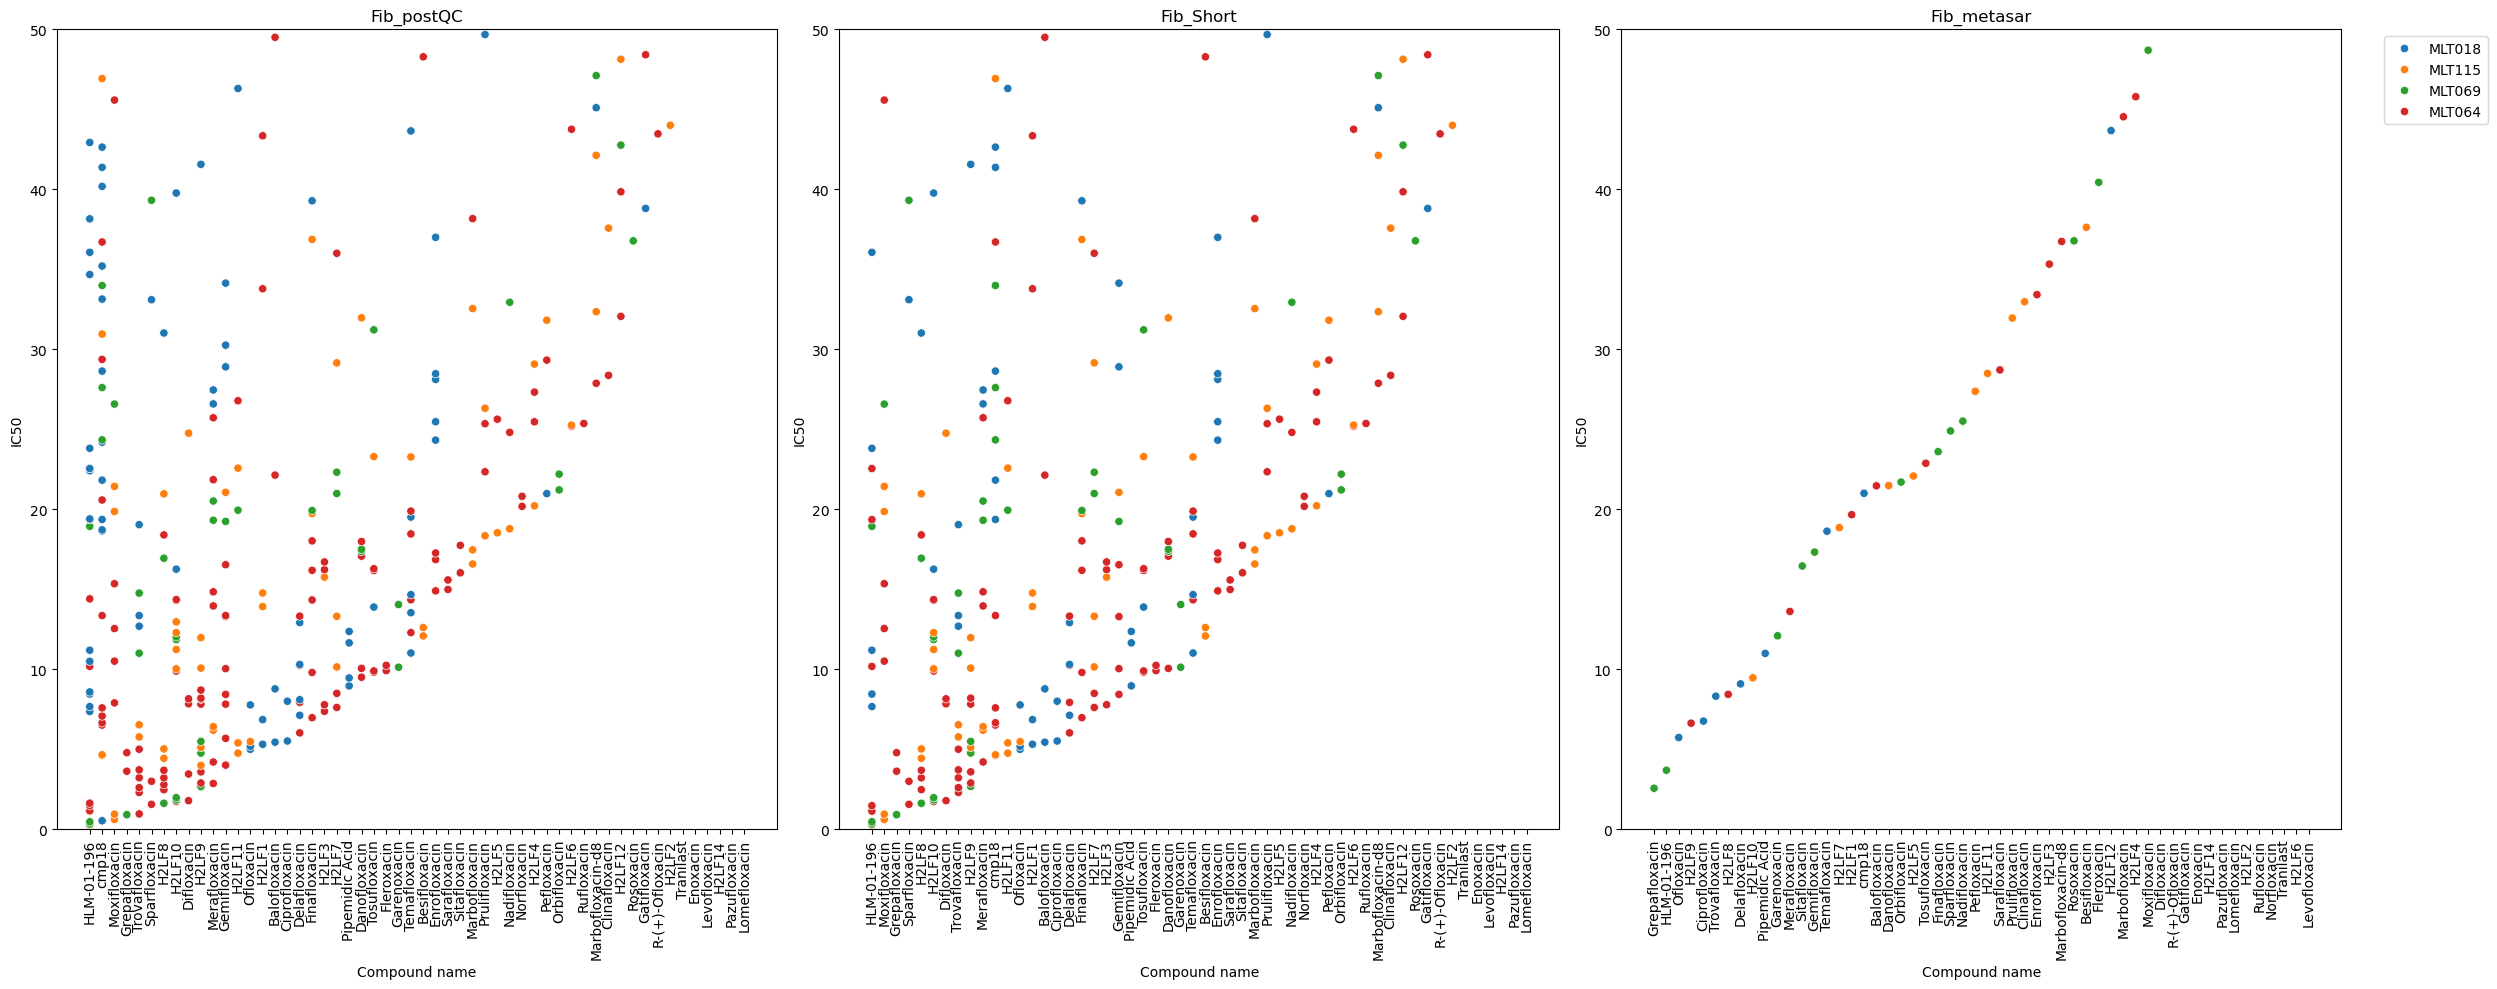

In [4]:
hue_order = ["MLT018", "MLT115", "MLT069", "MLT064"]

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# Plot 1: QIC_Fib_postQC_list
sns.scatterplot(y="IC50", x="Compound name", data=QIC_Fib_post4.sort_values(by="IC50"), hue="Cell line",
                hue_order=hue_order, ax=axs[0])
axs[0].set_title("Fib_postQC")
axs[0].set_ylim(0, 50)
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axs[0].legend().remove() 

# Plot 2: Fib_Short
sns.scatterplot(y="IC50", x="Compound name", data=Fib_short.sort_values(by="IC50"), hue="Cell line",
                hue_order=hue_order, ax=axs[1])
axs[1].set_title("Fib_Short")
axs[1].set_ylim(0, 50)
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axs[1].legend().remove() 

# Plot 3: Fib_Final
sns.scatterplot(y="IC50", x="Compound name", data=Fib_metasar.sort_values(by="IC50"), hue="Bestfit_IC50_CL",
                hue_order=hue_order, ax=axs[2])
axs[2].set_title("Fib_metasar")
axs[2].set_ylim(0, 50)
axs[2].tick_params(axis='x', rotation=90)
axs[2].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Collagen ranking plot

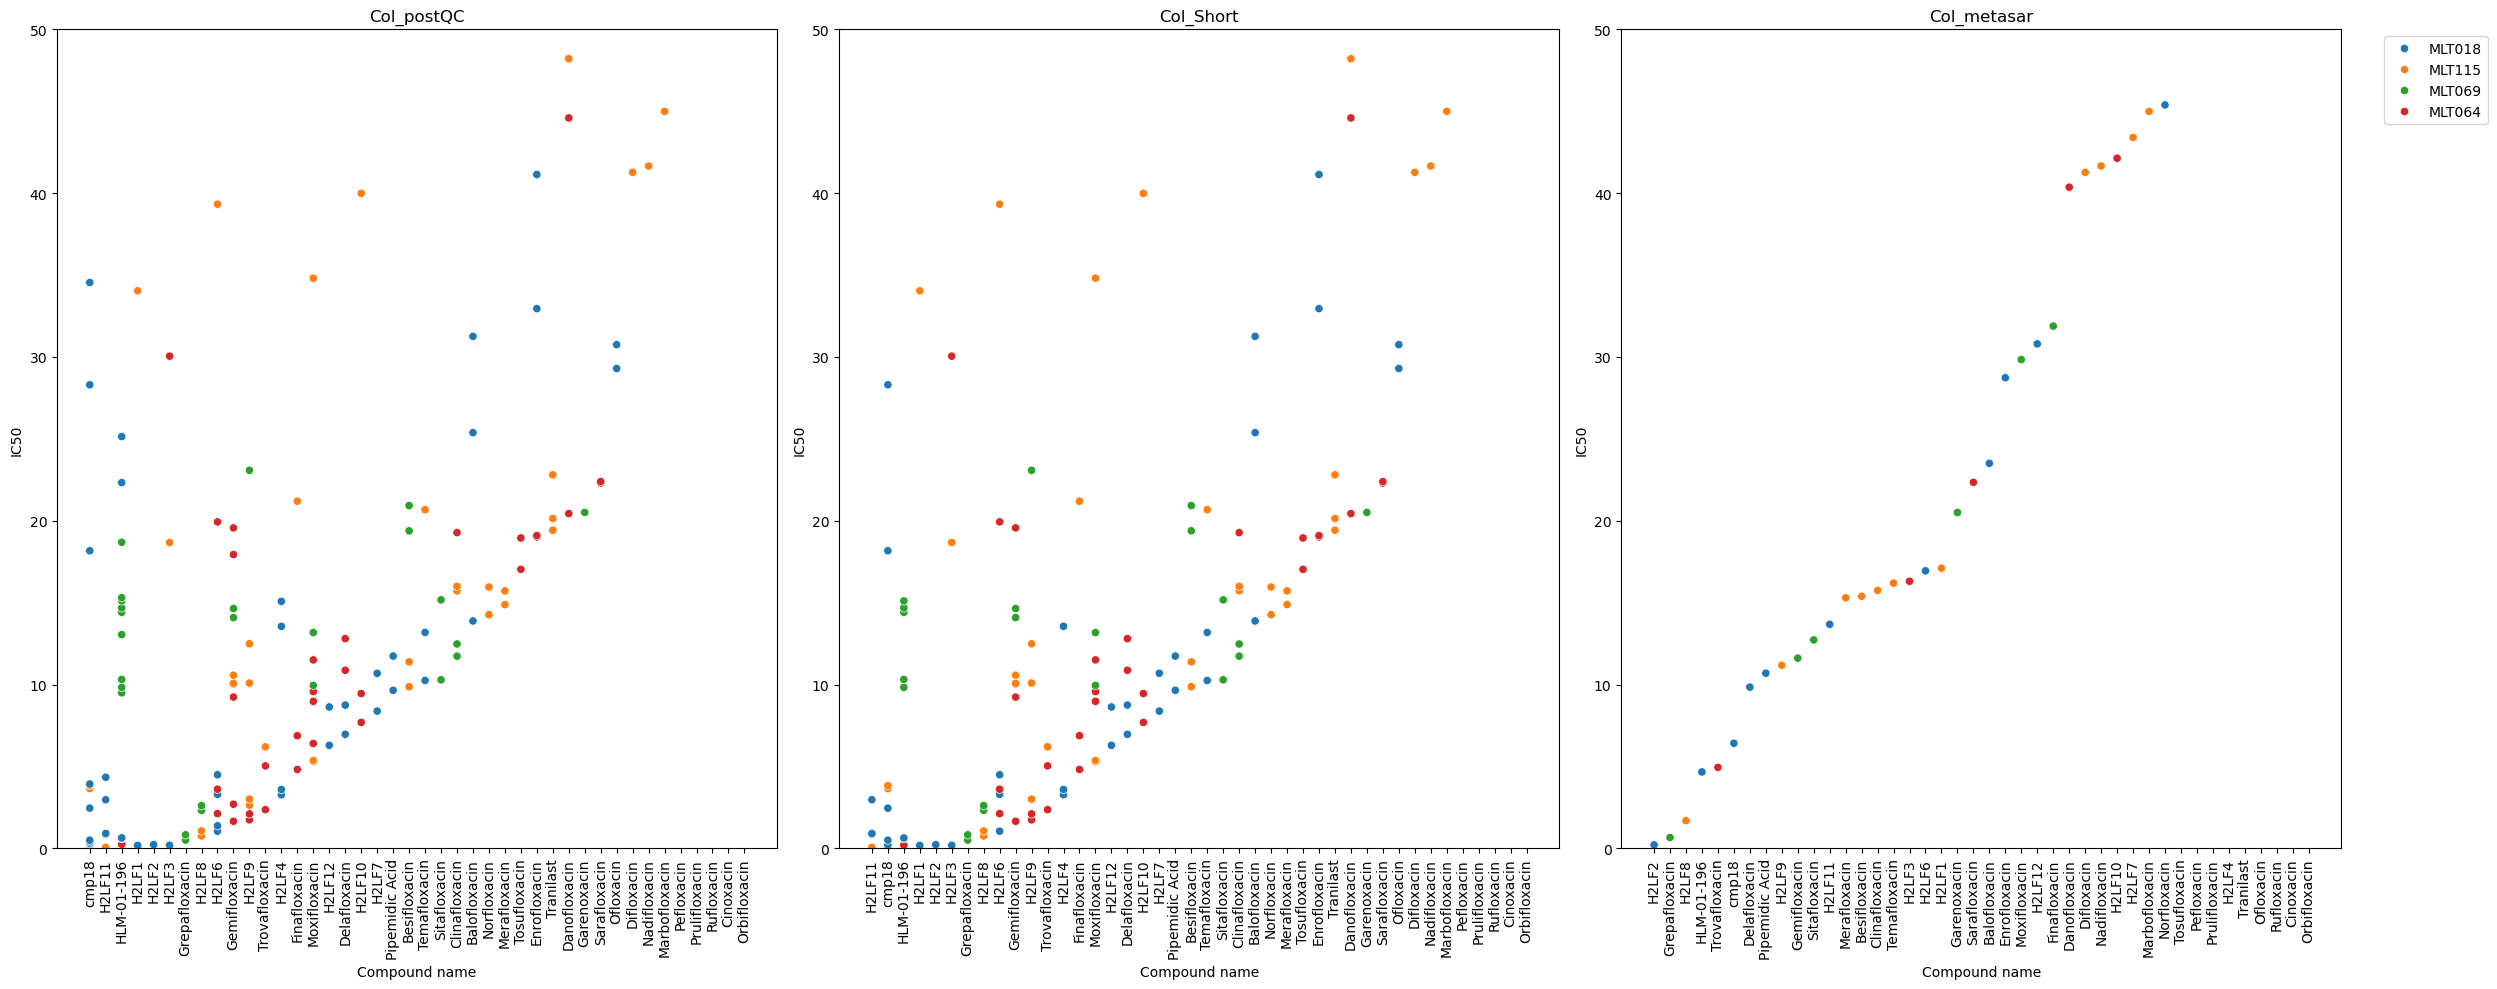

In [5]:
hue_order = ["MLT018", "MLT115", "MLT069", "MLT064"]

# Create a figure and a grid of subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# Plot 1: QIC_Col_postQC_list
sns.scatterplot(y="IC50", x="Compound name", data=QIC_Col_post4.sort_values(by="IC50"), hue="Cell line",
                hue_order=hue_order, ax=axs[0])
axs[0].set_title("Col_postQC")
axs[0].set_ylim(0, 50)
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axs[0].legend().remove() 

# Plot 2: Col_Short
sns.scatterplot(y="IC50", x="Compound name", data=Col_short.sort_values(by="IC50"), hue="Cell line",
                hue_order=hue_order, ax=axs[1])
axs[1].set_title("Col_Short")
axs[1].set_ylim(0, 50)
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axs[1].legend().remove() 

# Plot 3: Col_Final
sns.scatterplot(y="IC50", x="Compound name", data=Col_metasar.sort_values(by="IC50"), hue="Bestfit_IC50_CL",
                hue_order=hue_order, ax=axs[2])
axs[2].set_title("Col_metasar")
axs[2].set_ylim(0, 50)
axs[2].tick_params(axis='x', rotation=90)
axs[2].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Fibulin_metasar_df_dataranking

Compound name  IC50 Bestfit_IC50_CL
Grepafloxacin  2.56          MLT069
   HLM-01-196  3.69          MLT069
    Ofloxacin  5.73          MLT018
        H2LF9  6.63          MLT064
Ciprofloxacin  6.76          MLT018
Trovafloxacin  8.32          MLT018
        H2LF8  8.43          MLT064
 Delafloxacin  9.09          MLT018
       H2LF10  9.46          MLT115


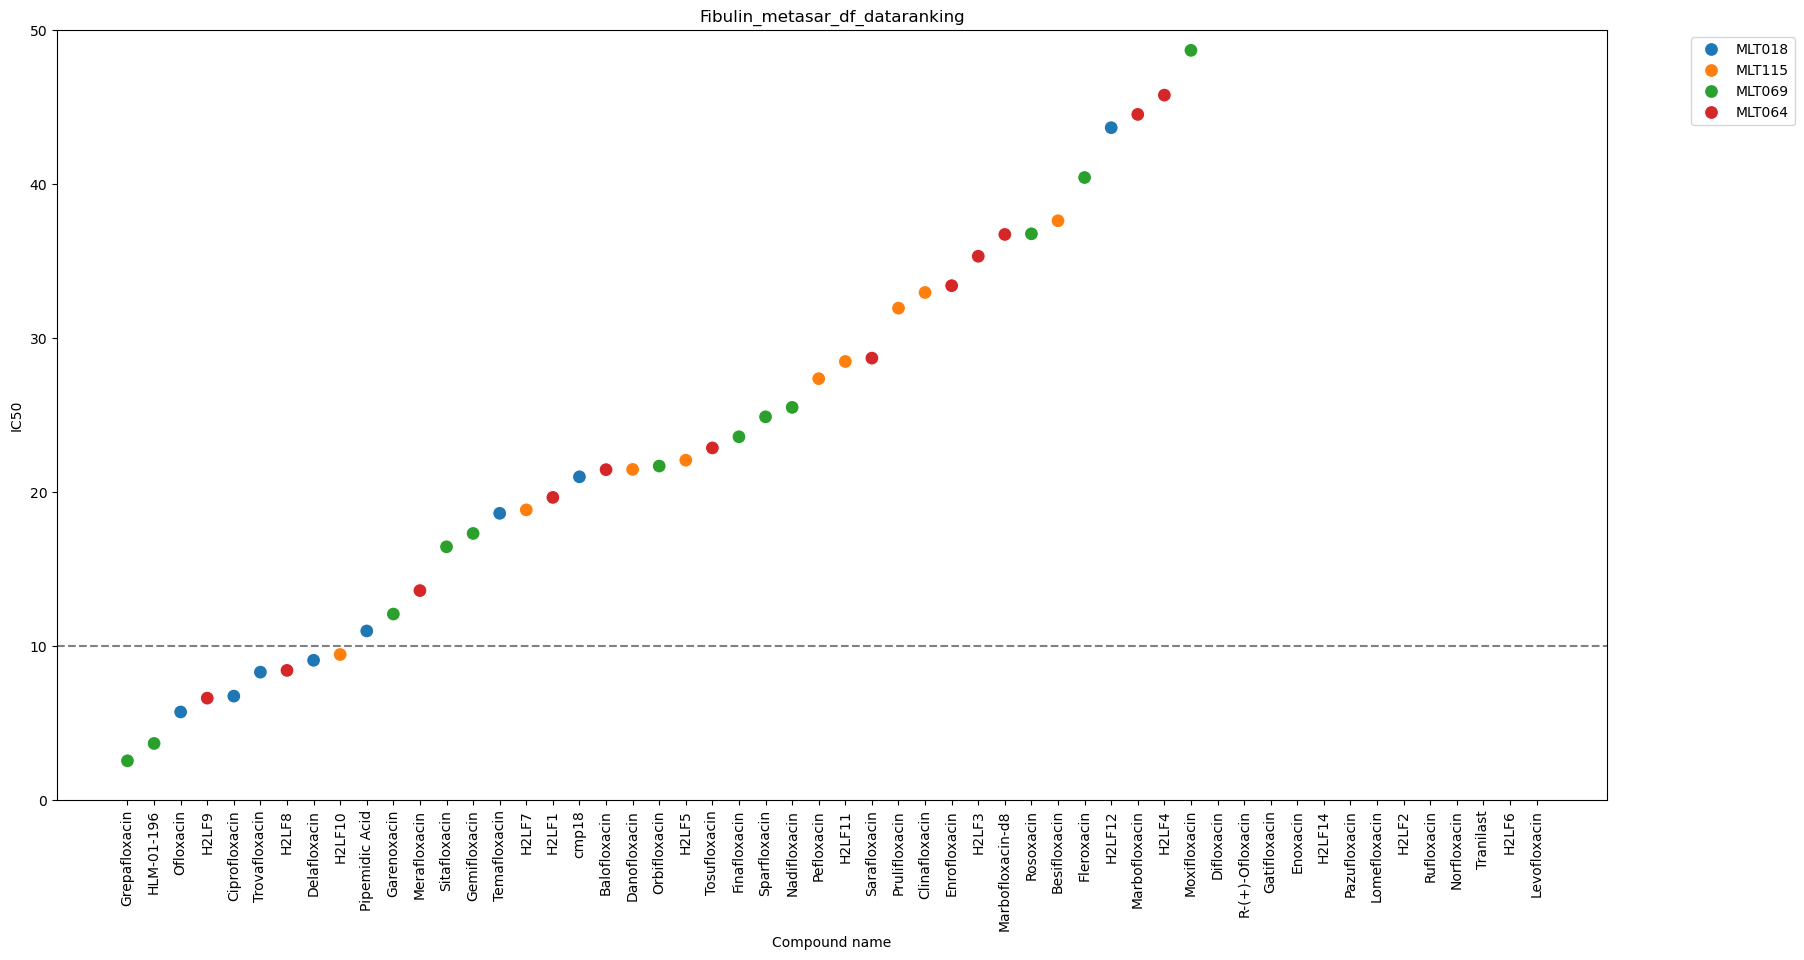

In [6]:
plt.figure(figsize=(20, 10))
sns.scatterplot(y="IC50", x="Compound name", data=Fib_metasar.sort_values(by="IC50"), hue="Bestfit_IC50_CL",s=100,
                hue_order=hue_order)
plt.ylim(0, 50)
plt.tick_params(axis='x', rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.axhline(y=10, color='grey', linestyle='--')
plt.title('Fibulin_metasar_df_dataranking')
print(Fib_metasar.query("IC50 < 10")[["Compound name","IC50","Bestfit_IC50_CL"]]
      .sort_values(["IC50"])
      .to_string(index=False, float_format=lambda x: f"{x:.2f}"))

### Collagen_metasar_df_dataranking

Compound name  IC50 Bestfit_IC50_CL
        H2LF2  0.22          MLT018
Grepafloxacin  0.67          MLT069
        H2LF8  1.70          MLT115
   HLM-01-196  4.67          MLT018
Trovafloxacin  4.95          MLT064
        cmp18  6.42          MLT018
 Delafloxacin  9.85          MLT018


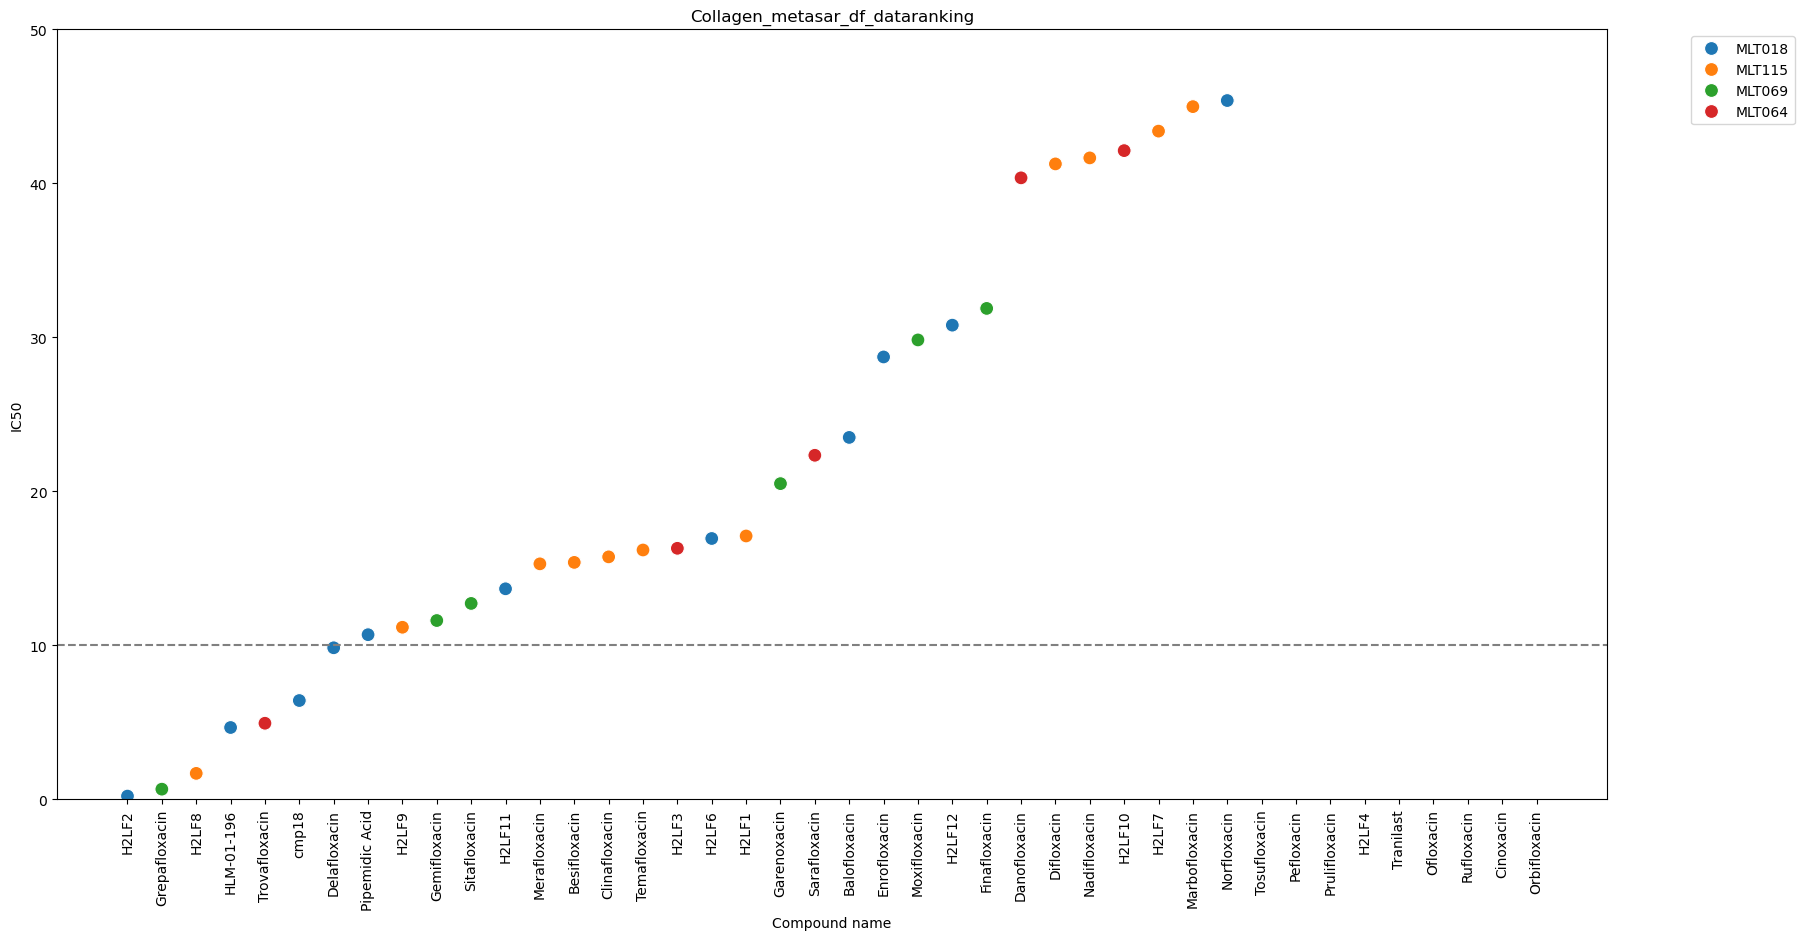

In [7]:
plt.figure(figsize=(20, 10))
sns.scatterplot(y="IC50", x="Compound name", data=Col_metasar.sort_values(by="IC50"), hue="Bestfit_IC50_CL",s=100,
                hue_order=hue_order)
plt.ylim(0, 50)
plt.tick_params(axis='x', rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.axhline(y=10, color='grey', linestyle='--')
plt.title('Collagen_metasar_df_dataranking')
print(Col_metasar.query("IC50 < 10")[["Compound name","IC50","Bestfit_IC50_CL"]]
      .sort_values(["IC50"])
      .to_string(index=False, float_format=lambda x: f"{x:.2f}"))

In [8]:
merged_data = pd.merge(Fib_metasar, Col_metasar, on="Compound name", how='inner', suffixes=('_Fib', '_Col'))

Pearson r = 0.307, p = 5.122e-02, n = 41
Spearman rho = 0.457, p = 2.692e-03, n = 41


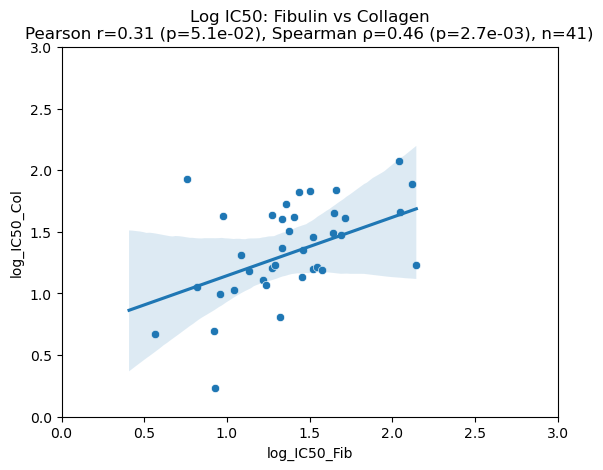

In [9]:
# Drop non-positive IC50s if there is any
from scipy import stats
df = merged_data.copy()
for col in ["IC50_Fib", "IC50_Col"]:
    df.loc[df[col] <= 0, col] = np.nan          # log undefined for <=0

df["log_IC50_Fib"] = np.log10(df["IC50_Fib"])
df["log_IC50_Col"] = np.log10(df["IC50_Col"])

# Pairwise complete cases
sub = df[["log_IC50_Fib", "log_IC50_Col"]].dropna()
x = sub["log_IC50_Fib"].to_numpy()
y = sub["log_IC50_Col"].to_numpy()

# Correlations
pearson_r, pearson_p = stats.pearsonr(x, y)
spearman_r, spearman_p = stats.spearmanr(x, y)

print(f"Pearson r = {pearson_r:.3f}, p = {pearson_p:.3e}, n = {len(sub)}")
print(f"Spearman rho = {spearman_r:.3f}, p = {spearman_p:.3e}, n = {len(sub)}")

# Plot, annotate, add a fit line
ax = sns.scatterplot(data=sub, x="log_IC50_Fib", y="log_IC50_Col")
sns.regplot(data=sub, x="log_IC50_Fib", y="log_IC50_Col", scatter=False, ax=ax)

ax.set_title(f"Log IC50: Fibulin vs Collagen\n"
             f"Pearson r={pearson_r:.2f} (p={pearson_p:.1e}), "
             f"Spearman ρ={spearman_r:.2f} (p={spearman_p:.1e}), n={len(sub)})")
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.show()
